This assignment covers **linear and polynomial regression**. Linear regression attempts to fit a line of best fit to a data set, using one or more features as coefficients for a linear equation. Here, We'll discuss:

Loading, manipulating and plotting data using numpy and matplotlib

The cost functions for linear and polynomial regression using analytical methods


Importing the libraries and uploading the dataset


In [17]:
import pandas as pd
import io
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving data1.txt to data1 (1).txt


Using pandas to read the text file and using dataframes to create feature_array and output_array

In [18]:

df = pd.read_csv(io.BytesIO(uploaded['data1.txt']),delim_whitespace = True,names = ['x','y'])
data = df.to_numpy()
x = df['x'].values
y = df['y'].values # gives a list
temp = x

for i in range(2,11):
   x = np.column_stack((x,pow(temp,i)))  # x is a numpy array

print(x.shape)
print(df.shape)
df


(100, 10)
(100, 2)


,x,y
0,0.58,-0.532533
1,-1.30,-0.895495
2,1.34,1.173752
3,0.02,2.973671
4,-0.46,3.750213
...,...,...
95,2.50,4.847862
96,0.94,-1.540882
97,0.42,-0.149300
98,1.98,3.185205


Splitting the data into training, validation and testing datasets

In [19]:

import numpy as np
#we want to split the data into 70:20:10 ratio for training |validation |testing


x = np.column_stack((np.ones(len(x)),x)) # adds a column of 1 s to the given x
y = np.array([y]).T

print(x.shape)
print(y.shape)

x_train , x_valid , x_test =x[:70] ,x[70:90] ,x[90:] 
y_train , y_valid , y_test =y[:70] ,y[70:90] ,y[90:] 


print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape) 





(100, 11)
(100, 1)
(70, 11) (70, 1)
(20, 11) (20, 1)
(10, 11) (10, 1)


Defining a function x_generator

In [21]:
def x_generator(X,degree):
  temp = X
  for i in range(2,degree + 1):
     X = np.column_stack((X,pow(temp,i)))  # x is a numpy array
  
  X = np.column_stack((np.ones(len(X)),X))
  return X

Plotting y_predicted vs x for different orders

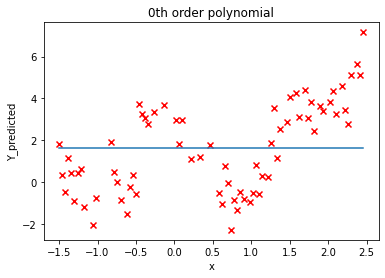

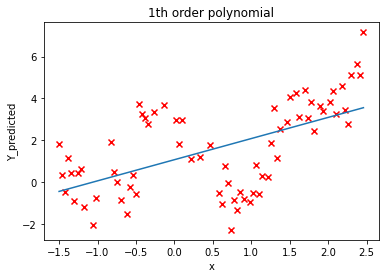

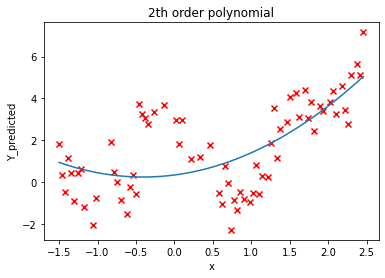

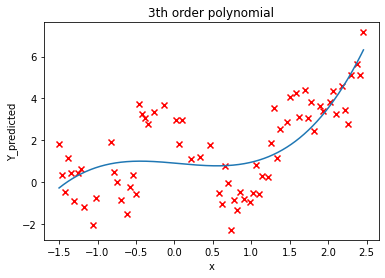

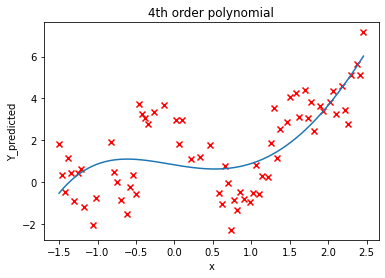

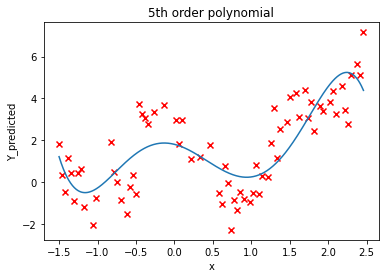

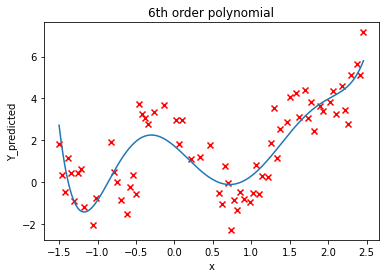

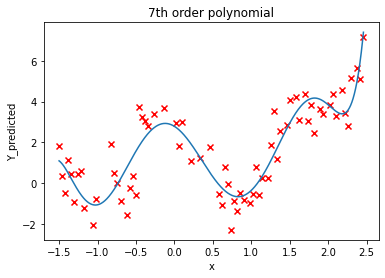

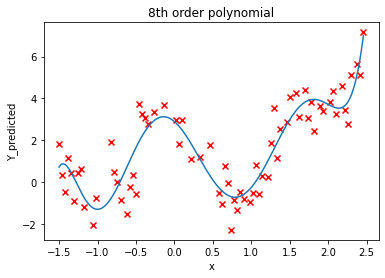

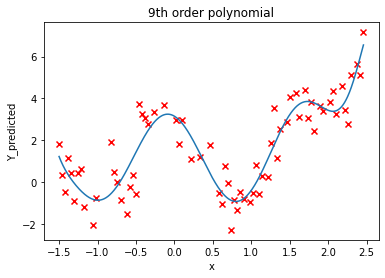

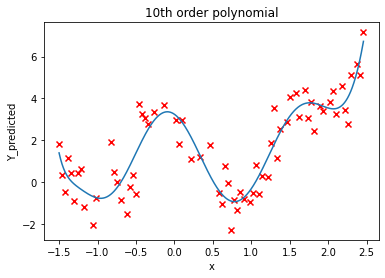

(11, 1)


In [22]:
# curve - Predicted y vs order of the polynomial used

import matplotlib.pyplot as plt
%matplotlib inline


#print(x_train[:,-10].shape)
#print(np.array(x_train).shape)
plt.xlabel('x')
plt.ylabel('Y_predicted')
w = []                                                  #used to store the parameters corresponding to different orders for least MSE
w.append(np.mean(y_train))
samples = np.linspace(min(x_train[:,1]),max(x_train[:,1]),1000)
plt.scatter(x_train[:,-10], y_train, marker='x', color='red')
plt.plot(samples,np.mean(y_train)*np.ones(1000))
plt.title("0th order polynomial", fontdict=None,loc = 'center')     # ikkada maarchali ----------------------------------------------------------------
plt.show()

for i in range(1,11): #11 to 2
  tempo = x_train[:,:(i+1)]
  w_min = np.matmul(np.linalg.inv(np.matmul(tempo.T,tempo)),np.matmul(tempo.T,y_train))
  w.append(w_min)
  samples_poly = x_generator(samples,i) # 10 to 1
  plt.scatter(x_train[:,-10], y_train, marker='x', color='red')
  plt.plot(samples,np.matmul(samples_poly,w_min) )
  plt.xlabel('x')
  plt.ylabel('Y_predicted')
  plt.title(str(i) + "th order polynomial", fontdict=None,loc = 'center')     # ikkada maarchali ----------------------------------------------------------------
  plt.show()
  #print(tempo.shape,w_min.shape) 

print(w[i].shape)

Defining the cost function and plotting validation_error vs order of the polynomials

[1.8444081750134742, 1.4647125612084129, 2.278521361385818, 2.0394489727645984, 2.1788110605836417, 1.5236119997239093, 1.8642449598281068, 1.1698227487534856, 1.2618957885328175, 1.0566553535249514, 1.0627727188245346]


Text(0, 0.5, 'Validation_error')

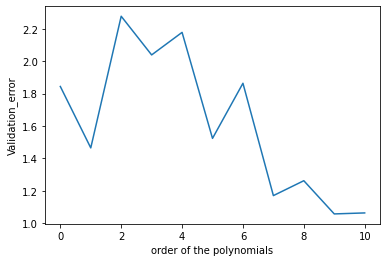

In [ ]:
#Plot the validation loss as a function of the polynomial order. Which polynomial order gives the best result.
def compute_cost(X, y, w):
    return np.sum(np.square(np.matmul(X,w) - y)) / (2 * len(y))

orders = np.linspace(0,10,11)
#print(x_valid[:,1])
validation = []
validation.append(np.sum(np.square(np.mean(y_train)*np.ones(y_valid.shape) - y_valid))/(2*len(y_valid)))
for i in range(1,11):
  validation.append(compute_cost(x_valid[:,:(i+1)],y_valid,w[i]))

#validation = np.array(validation)
print(validation)
plt.plot(orders, validation)
plt.xlabel('order of the polynomials')
plt.ylabel('Validation_error')

Plotting the validation_error vs regularization_lambda

Text(0, 0.5, 'Validation_error')

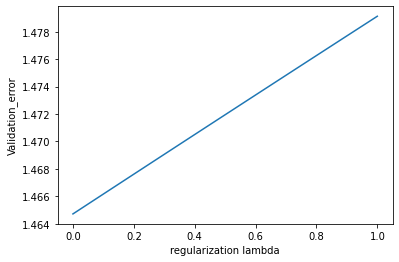

In [ ]:
#Perform ridge regression. Cross-validate for various choices of lambda and plot the error in the validation set as a function of lambda.
samp = np.linspace(0,1,100)
validation_ridge = []
for i in samp:
    w_minimum = np.matmul(np.linalg.inv(np.matmul(tempo[:,:2].T,tempo[:,:2]) + i*np.identity(np.matmul(tempo[:,:2].T,tempo[:,:2]).shape[0])),np.matmul(tempo[:,:2].T,y_train))
    #print(w_minimum.shape)
    validation_ridge.append(compute_cost(x_valid[:,:2],y_valid,w_minimum))

plt.plot(samp,validation_ridge)
plt.xscale('linear')
plt.xlabel('regularization lambda')
plt.ylabel('Validation_error')

Uploading a new dataset

In [23]:
from google.colab import files
uploaded = files.upload()


Saving data2.txt to data2 (1).txt


Using pandas to read the text file and using dataframes to create feature_array and output_array

In [25]:
df_1 = pd.read_csv(io.BytesIO(uploaded['data2.txt']),delim_whitespace = True,names = ['x_1','x_2','y'])
Y = df_1['y'].values # gives a list
X = df_1.drop('y' , axis = 1).values
X1 = df_1['x_1'].values
X2 = df_1['x_2'].values
X = np.column_stack((np.ones(len(X)),X))
print(X[:2])
power_index = { 0 : 1 , 1 : 3 }

for poly in range(2 , 11) :
  for i in range(poly+1) :
    temp = np.multiply(np.power(X1 , i) , np.power(X2 , poly -i))
    X = np.column_stack((X , temp))
  power_index[poly] = X.shape[1]
power_index , X.shape

[[1.         2.5933333  0.89333333]
 [1.         4.2333333  0.77      ]]


({0: 1, 1: 3, 2: 6, 3: 10, 4: 15, 5: 21, 6: 28, 7: 36, 8: 45, 9: 55, 10: 66},
 (301, 66))

Splitting the data into training, validation and testing data

In [26]:
x_train, x_valid, x_test = X[:210],X[210:270],X[270:]
y_train,y_valid , y_test = Y[:210],Y[210:270],Y[270:]
 

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape) 

(210, 66) (210,)
(60, 66) (60,)
(31, 66) (31,)


Plotting the y_predicted vs order of the polynomials

In [29]:
# curve - Predicted y vs order of the polynomial used

import matplotlib.pyplot as plt
%matplotlib inline


w = []                                                   #used to store the parameters corresponding to different orders for least MSE
w.append(np.mean(y_train))


for i in range(1,11): #11 to 2
  tempo = x_train[:,:power_index[i]]
  w_min = np.matmul(np.linalg.inv(np.matmul(tempo.T,tempo)),np.matmul(tempo.T,y_train))
  w.append(w_min)
  samples_poly = x_generator(samples,i) # 10 to 1
  
print(w[0])

0.7494990854385714


Plotting the validation_error vs order of the polynomials

[1.9012622479697125, 0.8759068518049787, 0.9480353620922766, 0.15033095856499165, 0.02976729410183063, 0.009157320323000168, 0.0023959080085469357, 0.0029700277175557788, 0.007116211077529483, 1.0005174632030425, 3.0829023991280087]


Text(0, 0.5, 'Validation_error')

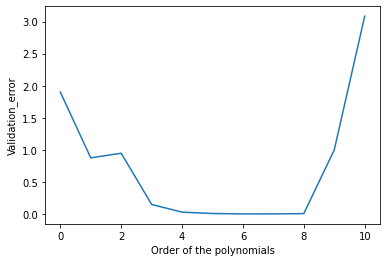

In [35]:
#Plot the validation loss as a function of the polynomial order. Which polynomial order gives the best result.
def compute_cost(X, y, w):
    return np.sum(np.square(np.matmul(X,w) - y)) / (2 * len(y))

orders = np.linspace(0,10,11)
validation = []
validation.append(np.sum(np.square(np.mean(y_train)*np.ones(y_valid.shape) - y_valid))/(2*len(y_valid)))
for i in range(1,11):
  validation.append(compute_cost(x_valid[:,:(power_index[i])],y_valid,w[i]))

print(validation)
plt.plot(orders, validation)
plt.xlabel('Order of the polynomials')
plt.ylabel('Validation_error')

Plotting the validation_error vs regularization_lambdas

Text(0, 0.5, 'Validation_error')

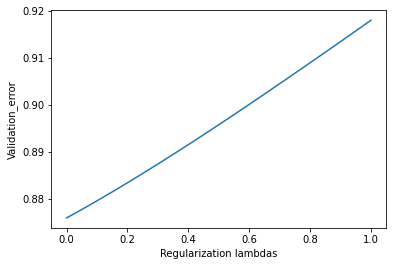

In [36]:
#Perform ridge regression. Cross-validate for various choices of lambda and plot the error in the validation set as a function of lambda.
samp = np.linspace(0,1,100) #diffferent lambdas
validation_ridge = []
for i in samp:
    w_minimum = np.matmul(np.linalg.inv(np.matmul(tempo[:,:3].T,tempo[:,:3]) + i*np.identity(np.matmul(tempo[:,:3].T,tempo[:,:3]).shape[0])),np.matmul(tempo[:,:3].T,y_train))
    #print(w_minimum.shape)
    validation_ridge.append(compute_cost(x_valid[:,:3],y_valid,w_minimum))

plt.plot(samp,validation_ridge)
plt.xscale('linear')
plt.xlabel('Regularization lambdas')
plt.ylabel('Validation_error')

Plotting the 3-D plots using mpl_toolkits

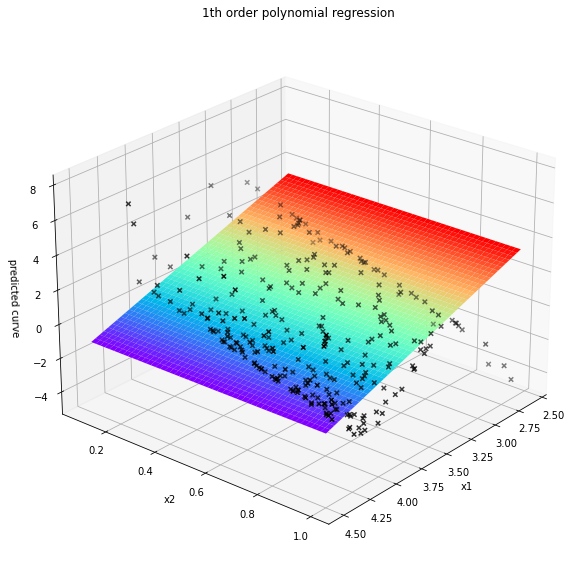

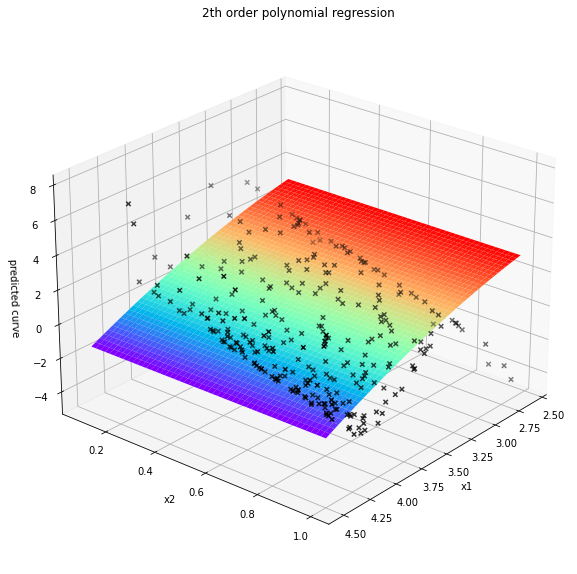

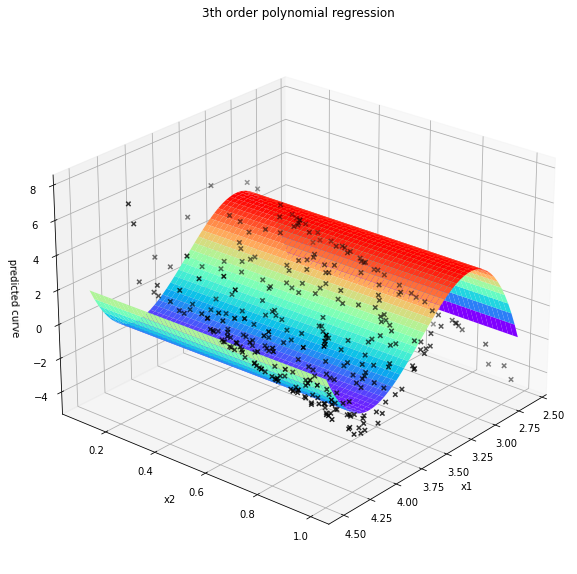

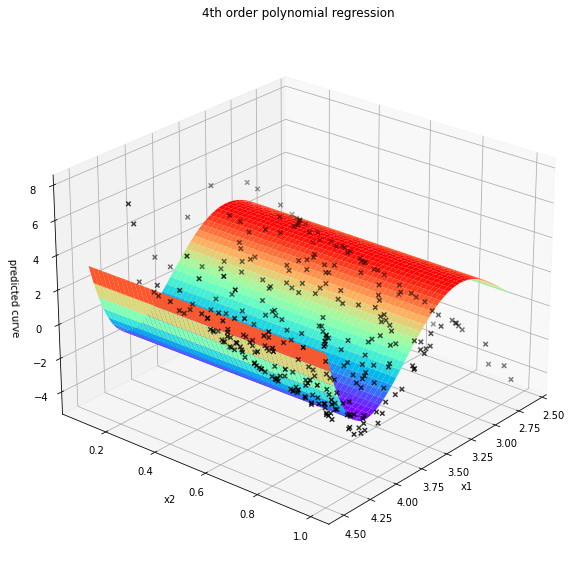

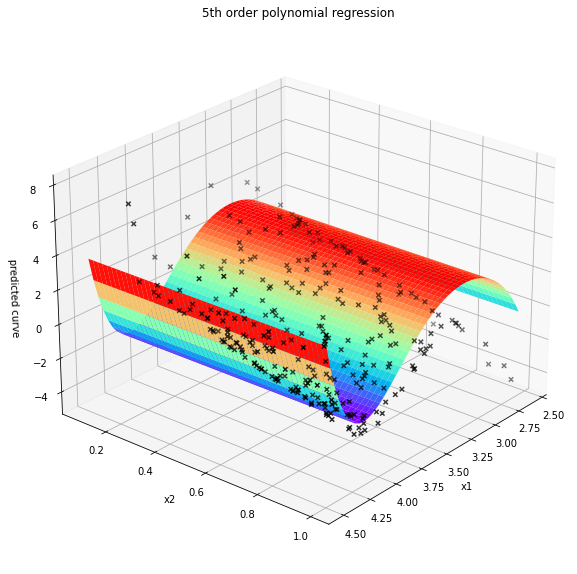

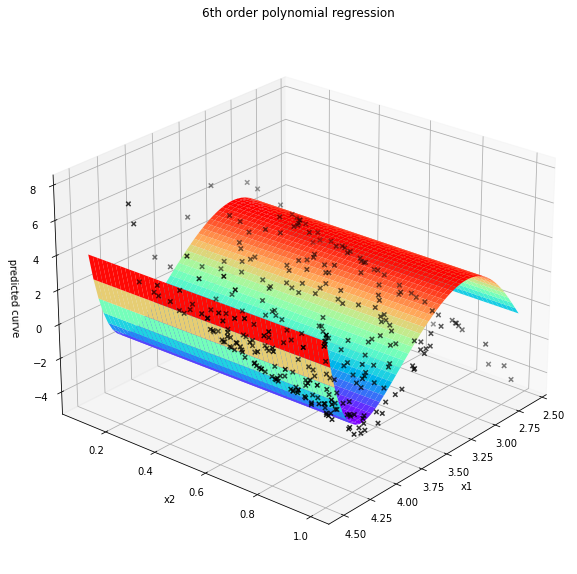

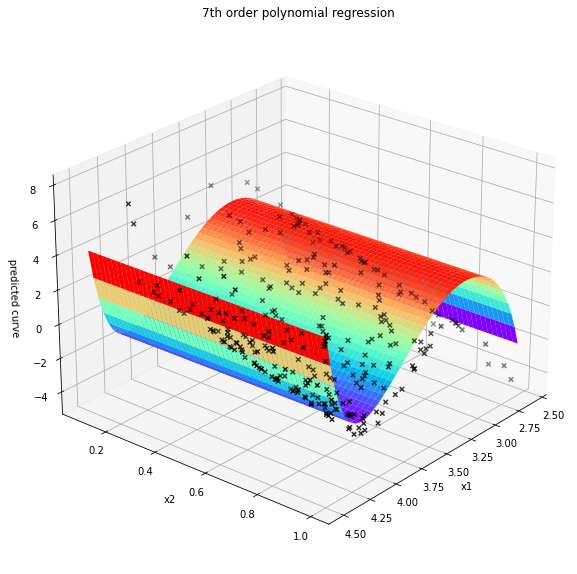

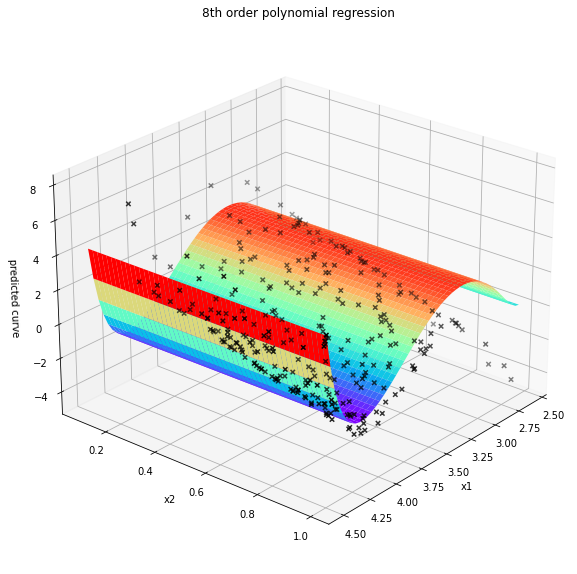

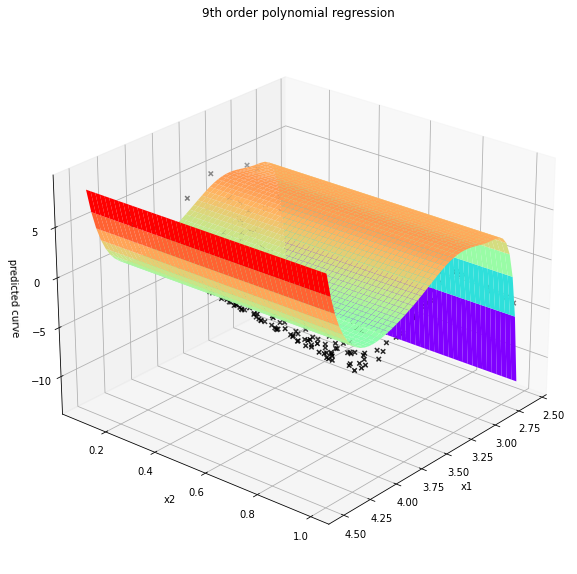

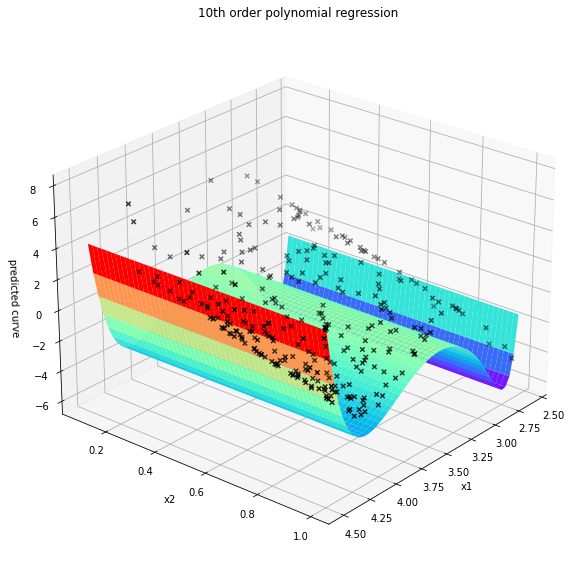

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

X_1, X_2 = np.meshgrid(np.linspace(min(X1),max(X1), 50), np.linspace(min(X2),max(X2),50))

a_1 = np.linspace(min(X1),max(X1), 50)
a_2 =  np.linspace(min(X2),max(X2),50)
A = np.column_stack((a_1,a_2))
A = np.column_stack((np.ones(len(a_1)), A))
for poly in range(2 , 11) :
  for i in range(poly+1) :
    temp = np.multiply(np.power(a_1, i) , np.power(a_2 , poly -i))
    A = np.column_stack((A, temp))


for i in range(1,11):
  Zs = np.array([np.matmul(A[:,:(power_index[i])],np.array(w[i]))])
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(projection='3d')
  ax.scatter3D(X1,X2,Y,marker = 'x',color = 'k')
  ax.set_xlabel(r'x1')
  ax.set_ylabel(r'x2')
  plt.title(str(i) + 'th order polynomial regression')
  ax.set_zlabel(r'predicted curve')
  ax.view_init(elev=25, azim=40)
  ax.plot_surface(X_1,X_2, Zs, cmap=cm.rainbow) 